# Receptor-ligand permutation test

This vignette demonstrates the usage of the permutation test as described in [CellPhoneDB](https://www.cellphonedb.org/) with the interations extracted from [OmniPath](https://omnipathdb.org/) database developed by [Saezlab](https://saezlab.org/).

The downside is that in the original implementation, apart from being inefficient, the CellPhoneDB database has only been manually curated for human interactions. To overcome this issue, we make use of the OmniPath database (containing CellPhoneDB as one of its many sources) which also focuses on literature curated rodent signalling pathways.

## Imports

In [1]:
import numpy as np
import pandas as pd

import scanpy as sc
import squidpy as sq

from anndata import AnnData

# Load the mouse data

In [2]:
adata = sc.datasets.paul15()

... storing 'paul15_clusters' as categorical
Trying to set attribute `.uns` of view, copying.


Normalize and create `.raw`.

In [3]:
sc.pp.normalize_per_cell(adata)

adata.raw = adata.copy()

## Run the CellPhoneDB's permutation test

### Use only CellPhoneDB as a resource

For mouse data, CellPhoneDB uses the ortholog genes, downloaded from biomart. They convert the mouse genes into their human orthologs and use that as an input ([latest source](https://github.com/Teichlab/cellphonedb/issues/194#issuecomment-721748905)).

In [4]:
res = sq.gr.ligrec(adata, "paul15_clusters",
                   fdr_method=None, copy=True,
                   interactions_params={"resources": "CellPhoneDB"},
                   threshold=0.1, seed=0, n_perms=10000, n_jobs=1)
df = res['pvalues']
print("Number of CellPhoneDB interactions (mouse data):", len(df))

df.head()

/home/michal/.miniconda3/envs/cellrank/lib/python3.8/site-packages/omnipath/_core/requests/_utils.py:155: FutureWarning: The default value of regex will change from True to False in a future version.
  _split_unique_join(data.str.replace(r"[-\w]*:?(\d+)", r"\1")), func=func


  0%|          | 0/10000 [00:00<?, ?permutation/s]

Number of CellPhoneDB interactions (mouse data): 26


cluster_1          10GMP                                                 \
cluster_2          10GMP    11DC 12Baso  13Baso    14Mo    15Mo   16Neu   
source  target                                                            
CXCL10  DPP4         NaN     NaN    NaN     NaN     NaN     NaN     NaN   
CSF1    SLC7A1       NaN     NaN    NaN     NaN     NaN     NaN     NaN   
TNFSF14 LTBR         NaN     NaN    NaN     NaN     NaN     NaN     NaN   
GRN     TNFRSF1A  0.2868  0.4736  0.531  0.0000  0.0000  0.0000  0.0000   
        TNFRSF1B     NaN     NaN    NaN  0.1943  0.0358  0.0444  0.0302   

cluster_1                                ...    9GMP                      \
cluster_2         17Neu   18Eos 19Lymph  ... 19Lymph 1Ery 2Ery 3Ery 4Ery   
source  target                           ...                               
CXCL10  DPP4        NaN     NaN     NaN  ...     NaN  NaN  NaN  NaN  NaN   
CSF1    SLC7A1      NaN     NaN     NaN  ...     NaN  NaN  NaN  NaN  NaN   
TNFSF14 LTBR        NaN     NaN     NaN  ...     NaN  NaN  NaN  NaN  NaN   
GRN     TNFRSF1A  0.204  0.7944  0.3359  ...  0.1427  NaN  NaN  NaN  NaN   
        TNFRSF1B    NaN     NaN     NaN  ...     NaN  NaN  NaN  NaN  NaN   

cluster_1                                       
cluster_2           5Ery 6Ery 7MEP 8Mk    9GMP  
source  target                                  
CXCL10  DPP4         NaN  NaN  NaN NaN     NaN  
CSF1    SLC7A1       NaN  NaN  NaN NaN     NaN  
TNFSF14 LTBR         NaN  NaN  NaN NaN     NaN  
GRN     TNFRSF1A  0.8665  NaN  NaN NaN  0.0908  
        TNFRSF1B     NaN  NaN  NaN NaN     NaN  

[5 rows x 361 columns]

The tori mark significant p-values (`alpha=0.001` by default). `molecule1` belongs to the source cluster (top) whereas `moleule2` to the target clusters.

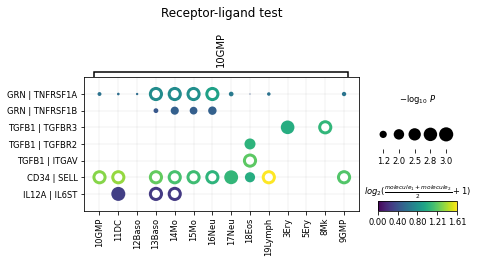

In [5]:
sq.pl.ligrec(res, source_groups="10GMP")

### Use all available resources from OmniPath

In [6]:
res = sq.gr.ligrec(adata, "paul15_clusters",
                   fdr_method=None, copy=True,
                   threshold=0.1, seed=0, n_perms=10000, n_jobs=1)
df = res['pvalues']
print("Number of OmniPath interactions (mouse data):", len(df))

df.head()

/home/michal/.miniconda3/envs/cellrank/lib/python3.8/site-packages/omnipath/_core/requests/_utils.py:155: FutureWarning: The default value of regex will change from True to False in a future version.
  _split_unique_join(data.str.replace(r"[-\w]*:?(\d+)", r"\1")), func=func


  0%|          | 0/10000 [00:00<?, ?permutation/s]

Number of OmniPath interactions (mouse data): 246


cluster_1     10GMP                                                         \
cluster_2     10GMP 11DC 12Baso 13Baso 14Mo 15Mo 16Neu 17Neu 18Eos 19Lymph   
source target                                                                
FYN    LAT      NaN  NaN    NaN    NaN  NaN  NaN   NaN   NaN   NaN     NaN   
PTPN11 LAT      NaN  NaN    NaN    NaN  NaN  NaN   NaN   NaN   NaN     NaN   
PTPN6  LAT      NaN  NaN    NaN    NaN  NaN  NaN   NaN   NaN   NaN     NaN   
FYN    PRKCA    NaN  NaN    NaN    NaN  NaN  NaN   NaN   0.0   NaN     NaN   
PTPN11 PRKCA    NaN  NaN    NaN    NaN  NaN  NaN   NaN   0.0   NaN     NaN   

cluster_1      ...    9GMP                                                     
cluster_2      ... 19Lymph 1Ery 2Ery 3Ery 4Ery 5Ery 6Ery    7MEP     8Mk 9GMP  
source target  ...                                                             
FYN    LAT     ...     NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0000  0.0000  NaN  
PTPN11 LAT     ...     NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0159  0.0000  NaN  
PTPN6  LAT     ...     NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.1023  0.0006  NaN  
FYN    PRKCA   ...     NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  0.0000  NaN  
PTPN11 PRKCA   ...     NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  0.1858  NaN  

[5 rows x 361 columns]

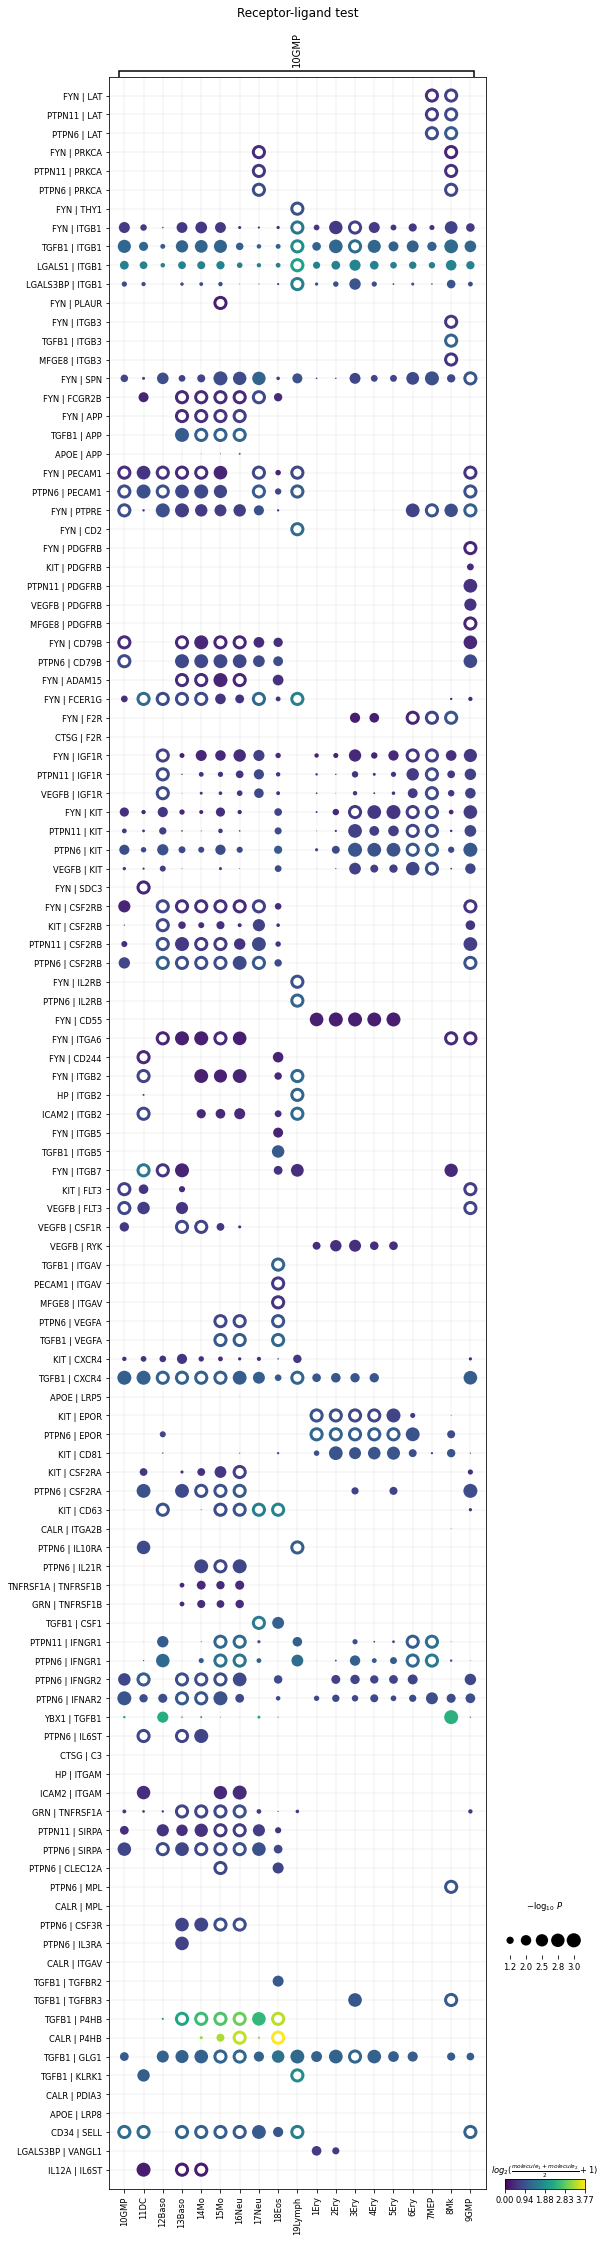

In [7]:
sq.pl.ligrec(res, source_groups="10GMP")

# Load the human data

In [ ]:
adata = sc.datasets.pbmc3k_processed()
adata

  0%|          | 0.00/23.5M [00:00<?, ?B/s]

## Run the CellPhoneDB's permutation test

### Use only CellPhoneDB as a resource

In [ ]:
res = sq.gr.ligrec(adata, "louvain",
                   fdr_method=None, copy=True,
                   interactions_params={"resources": "CellPhoneDB"},
                   threshold=0.1, seed=0, n_perms=10000, n_jobs=1)
df = res['pvalues']
print("Number of CellPhoneDB interactions (human data):", len(df))

df.head()

In [ ]:
sq.pl.ligrec(res, source_groups=["CD4 T cells", "B cells"], dendrogram=None)

### Use all available resources from OmniPath

In [ ]:
res = sq.gr.ligrec(adata, "louvain",
                   fdr_method=None, copy=True,
                   threshold=0.1, seed=0, n_perms=10000, n_jobs=1)
df = res['pvalues']
print("Number of OmniPath interactions (human data):", len(df))

df.head()

In [ ]:
sq.pl.ligrec(res, source_groups=["CD4 T cells", "B cells"])

# Conluding remarks

Using OmniPath as an interation source yields approx. ~7x more interactions than from CellPhoneDB for the selected human data and ~11x interactions for the seleted mouse data (internally in `squidpy.gr.ligrec`, we map the mouse gene symbols to human simply by uppercasing).

In the context of spatial tools, the goal is to use the permutation test from CellPhoneDB to analyze receptor-ligand interaction pairs in clusters that are spatially close.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sc.set_figure_params(facecolor="white", figsize=(8, 8))


dic = {
    "dataset" : ["paul15","pbmc3k","paul15","pbmc3k"],
    "organism" : ["mouse","human","mouse","human"],
    "n_interactions" : [9,76,107,510],
    "database" : ["cellphonedb","cellphonedb","omnipath","omnipath"] 
}
df = pd.DataFrame(dic)
fix, ax = plt.subplots(1,1,figsize=(3,3))
sns.scatterplot(data=df, x="dataset", y="n_interactions",hue="database", s=200)

